In [89]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [90]:
# Load the dataset

df_enrollment_data = pd.read_csv("Resources/data.csv", sep=';')

In [91]:
# Rename and clean columns

df_enrollment_data.rename(columns={
    'Daytime/evening attendance\t': 'Attendance (Evening/Daytime)',
    'Nacionality': 'Nationality',
    'Age at enrollment': 'Age at time of enrollment',
    'International': 'International Student'
}, inplace=True)

# Replace specific column names for semester results
df_enrollment_data.columns = (
    df_enrollment_data.columns
    .str.replace('1st sem', '- S1')
    .str.replace('2nd sem', '- S2')
)

In [92]:
# Create a target column called "random_tree_target"
df_enrollment_data['random_tree_target'] = df_enrollment_data['Target']

# Encode 'random_tree_target' if it's categorical
label_encoder = LabelEncoder()
df_enrollment_data['random_tree_target'] = label_encoder.fit_transform(df_enrollment_data['random_tree_target'])

# Display the mapping of encoded labels
print("Label Mapping:", dict(enumerate(label_encoder.classes_)))


Label Mapping: {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}


In [93]:
# Encode all other categorical columns
# Convert non-numerical columns (e.g., nationality, attendance) to numerical values using one-hot encoding or label encoding
df_encoded = pd.get_dummies(df_enrollment_data, drop_first=True)

In [94]:
# Define features (X) and target variable (y)
X = df_encoded.drop('random_tree_target', axis=1)  
y = df_encoded['random_tree_target']  

In [95]:
#drop the leakeage columns: Target_Enrolled and Target_Graduate

leakage_features = ['Target_Enrolled', 'Target_Graduate']
X = X.drop(columns=leakage_features)

In [96]:
# Split the data into training and testing sets
# Use an 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
# Initialize the Random Forest Classifier
# rf_model = RandomForestClassifier(
#    n_estimators=100,  # Number of trees in the forest
#    random_state=42,  # Reproducibility
#    class_weight='balanced'  # Address class imbalance
#)

rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',  # Consider only a subset of features for splits
    random_state=42,
    class_weight='balanced'
)


In [98]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', n_estimators=50, random_state=42)

In [99]:
# Evaluate feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

In [100]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
30,Curricular units - S2 (approved),0.156081
31,Curricular units - S2 (grade),0.122039
24,Curricular units - S1 (approved),0.085482
25,Curricular units - S1 (grade),0.064497
16,Tuition fees up to date,0.050926
23,Curricular units - S1 (evaluations),0.045756
19,Age at time of enrollment,0.042026
29,Curricular units - S2 (evaluations),0.042018
12,Admission grade,0.035850
6,Previous qualification (grade),0.028615


In [101]:
# Display the top 10 most important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

Top 10 Important Features:
                                Feature  Importance
30     Curricular units - S2 (approved)    0.156081
31        Curricular units - S2 (grade)    0.122039
24     Curricular units - S1 (approved)    0.085482
25        Curricular units - S1 (grade)    0.064497
16              Tuition fees up to date    0.050926
23  Curricular units - S1 (evaluations)    0.045756
19            Age at time of enrollment    0.042026
29  Curricular units - S2 (evaluations)    0.042018
12                      Admission grade    0.035850
6        Previous qualification (grade)    0.028615


In [102]:
# Display the 10 least important features
print("\n10 Least Important Features:")
print(feature_importance_df.tail(10))


10 Least Important Features:
                                        Feature  Importance
13                                    Displaced    0.005853
5                        Previous qualification    0.005324
26  Curricular units - S1 (without evaluations)    0.004545
0                                Marital status    0.004130
27             Curricular units - S2 (credited)    0.004067
32  Curricular units - S2 (without evaluations)    0.004002
4                  Attendance (Evening/Daytime)    0.002087
20                        International Student    0.001774
7                                   Nationality    0.001598
14                    Educational special needs    0.000936


In [103]:
# Drop 10 least important features

# Identify the 10 least important features
least_important_features = feature_importance_df.tail(10)['Feature'].tolist()

# Drop the least important features from the feature set
X = X.drop(columns=least_important_features)

# Confirm the features have been dropped
print(f"Features dropped: {least_important_features}")
print(f"Remaining features: {X.shape[1]}")

Features dropped: ['Displaced', 'Previous qualification', 'Curricular units - S1 (without evaluations)', 'Marital status', 'Curricular units - S2 (credited)', 'Curricular units - S2 (without evaluations)', 'Attendance (Evening/Daytime)', 'International Student', 'Nationality', 'Educational special needs']
Remaining features: 26


In [104]:
X_test.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Attendance (Evening/Daytime)', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at time of enrollment', 'International Student',
       'Curricular units - S1 (credited)', 'Curricular units - S1 (enrolled)',
       'Curricular units - S1 (evaluations)',
       'Curricular units - S1 (approved)', 'Curricular units - S1 (grade)',
       'Curricular units - S1 (without evaluations)',
       'Curricular units - S2 (credited)', 'Curricular units - S2 (enrolled)',
       'Curricular units - S2 (evaluations)',
       'Curricular units - S2 (approved)', 'Curricular units - S2 (grade)',
       'Curricular units - S2 

In [105]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2,

In [106]:
rf_model.feature_names_in_

array(['Marital status', 'Application mode', 'Application order',
       'Course', 'Attendance (Evening/Daytime)', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at time of enrollment', 'International Student',
       'Curricular units - S1 (credited)',
       'Curricular units - S1 (enrolled)',
       'Curricular units - S1 (evaluations)',
       'Curricular units - S1 (approved)',
       'Curricular units - S1 (grade)',
       'Curricular units - S1 (without evaluations)',
       'Curricular units - S2 (credited)',
       'Curricular units - S2 (enrolled)',
       'Curricular units - S2 (evaluations)',
       'Curricular units - S2 (approved)',
       'Curricular units - S2 (grade)',
  

In [107]:
# Evaluate the model
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       284
           1       0.44      0.55      0.49       159
           2       0.84      0.85      0.85       442

    accuracy                           0.75       885
   macro avg       0.70      0.70      0.70       885
weighted avg       0.76      0.75      0.75       885



In [108]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[197  54  33]
 [ 32  87  40]
 [  9  56 377]]


/var/folders/gp/fb89f3850h9fp_n96ycvw9380000gn/T/ipykernel_41519/2367574844.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='random_tree_target', data=df_enrollment_data, palette='viridis')


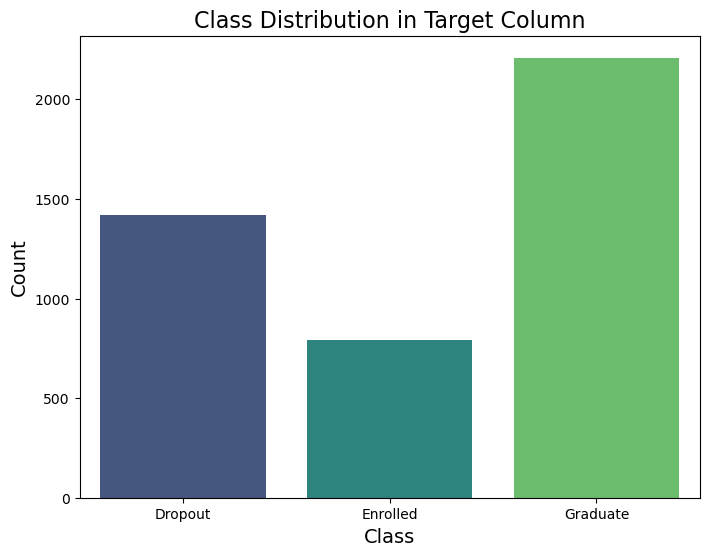

In [109]:
# Plot the class distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='random_tree_target', data=df_enrollment_data, palette='viridis')
plt.title('Class Distribution in Target Column', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=label_encoder.classes_)  # Replace with actual labels
plt.show()

/var/folders/gp/fb89f3850h9fp_n96ycvw9380000gn/T/ipykernel_41519/1698256778.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Features')

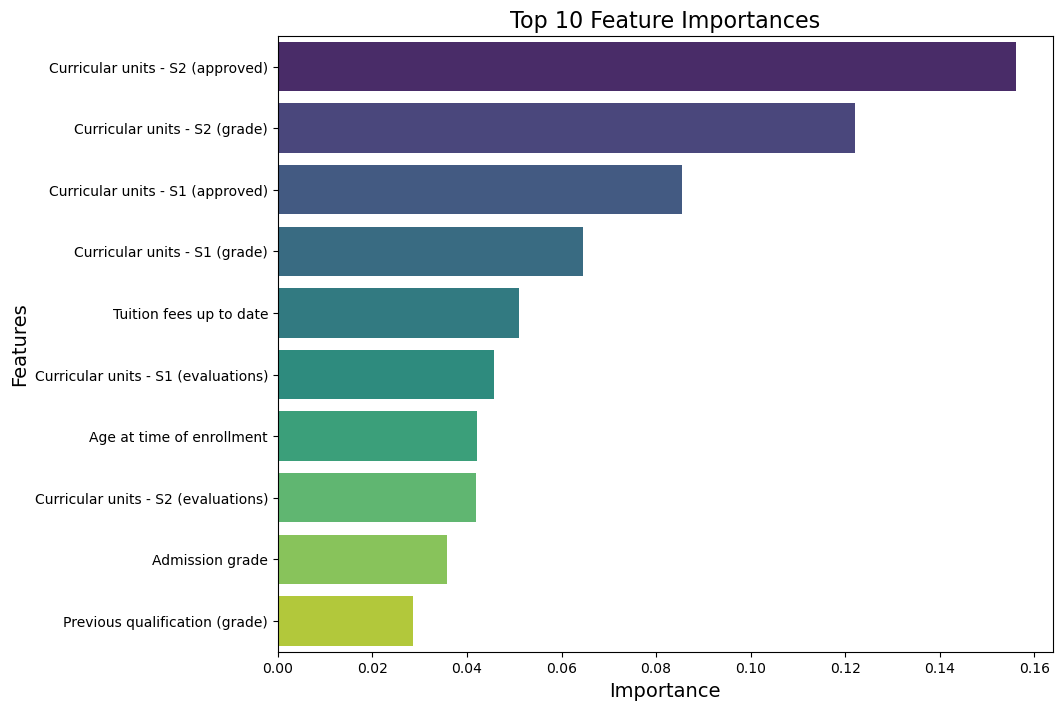

In [110]:
# Plot feature importance

plt.figure(figsize=(10, 8))
sns.barplot(
    x=feature_importance_df['Importance'][:10], 
    y=feature_importance_df['Feature'][:10], 
    palette='viridis'
)
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
# Display the confusion matrix as a heatmapplt.show()

<Figure size 800x600 with 0 Axes>

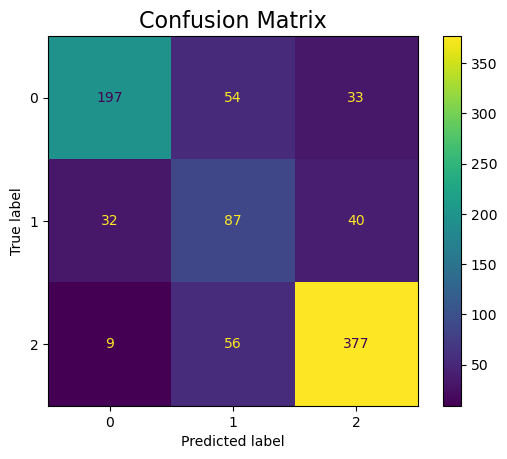

In [111]:
# Display the confusion matrix as a heatmap

from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='viridis', values_format='d')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

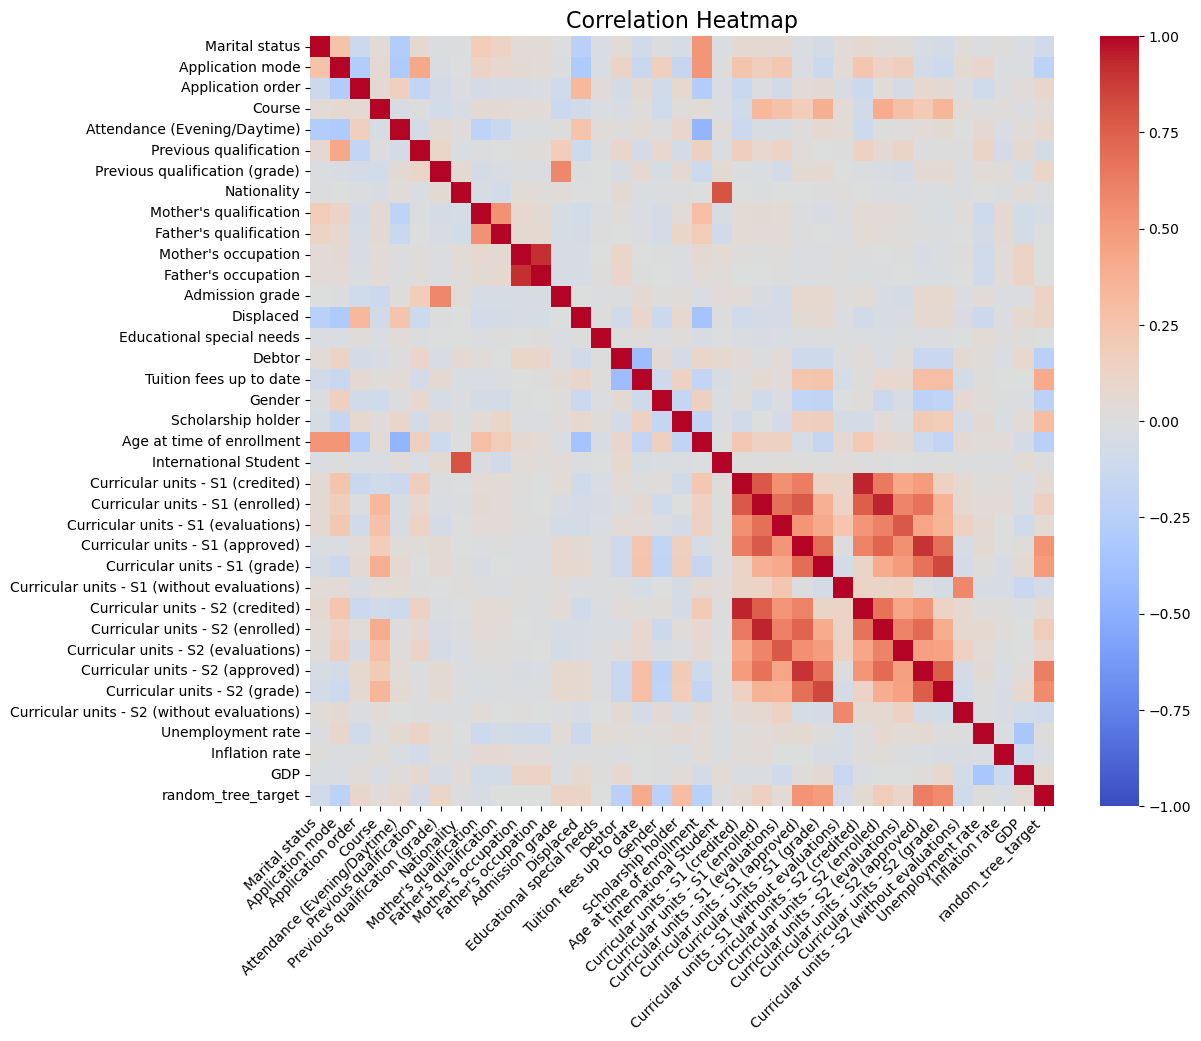

In [112]:
# Calculate correlation matrix

# Select only numeric columns for correlation calculation
numeric_data = df_enrollment_data.select_dtypes(include=['number'])

# Calculate the correlation matrix using only numeric columns
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.show()


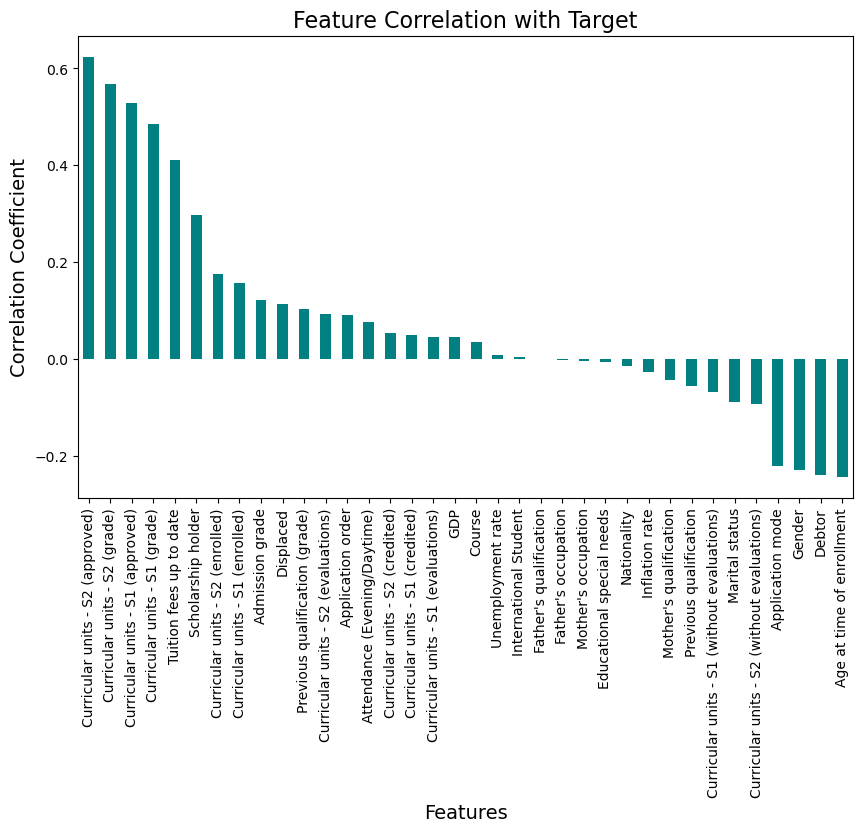

In [113]:
# Correlation of features with the target
correlation_with_target = numeric_data.corr()['random_tree_target'].sort_values(ascending=False)

# Plot correlation
plt.figure(figsize=(10, 6))
correlation_with_target.drop('random_tree_target').plot(kind='bar', color='teal')
plt.title('Feature Correlation with Target', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.show()


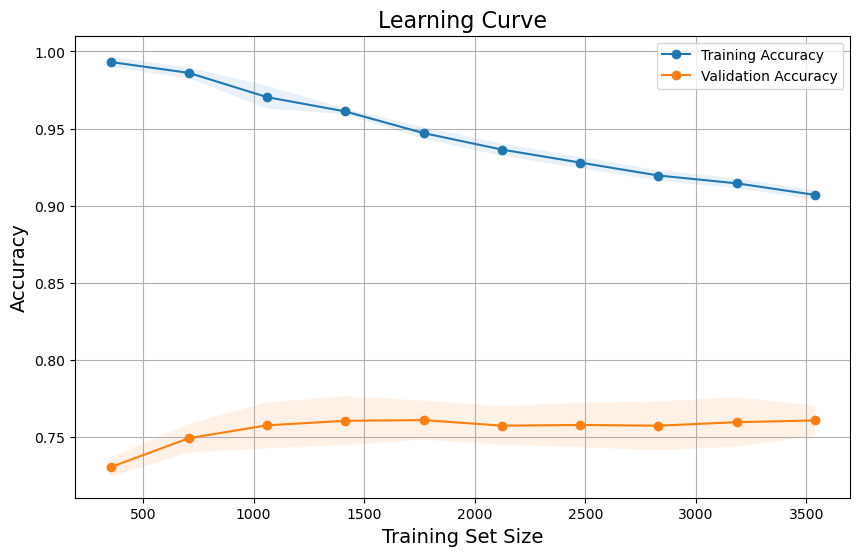

In [114]:
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and std for train/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning Curve', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid()
plt.show()



- Your current model is a solid baseline with realistic results. 
- The overall accuracy of 75% is reasonable for a real-world machine learning problem, especially for a multi-class classification task.
- This is a significant drop compared to the artificially perfect results you achieved earlier, which confirms that the earlier model was overfitting due to data leakage.

